In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns             
from sklearn.decomposition import PCA
# Model Selection / Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression

# Tree-based Models
from sklearn.tree import DecisionTreeClassifier, plot_tree

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# Support Vector Machines
from sklearn.svm import SVC

# Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score, f1_score, roc_curve, auc


# Heart Failure Dataset

In [47]:
df = pd.read_csv('/home/haider/Desktop/Office/Python/Projects/heart-failure-prediction/data/heart.csv')

In [48]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [49]:
df.shape

(918, 12)

In [50]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [51]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [52]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [53]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])

df.head(10)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [54]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [55]:
df_linear = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)


In [56]:
df_non_linear =  pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=False)


In [57]:
df_linear.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,True,False,True,False,False,True
6,45,0,130,237,0,170,0,0.0,0,True,False,False,True,False,False,True
7,54,1,110,208,0,142,0,0.0,0,True,False,False,True,False,False,True
8,37,1,140,207,0,130,1,1.5,1,False,False,False,True,False,True,False
9,48,0,120,284,0,120,0,0.0,0,True,False,False,True,False,False,True


In [58]:
df_non_linear.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,False,True,False,False,True,False,False,False,True
6,45,0,130,237,0,170,0,0.0,0,False,True,False,False,False,True,False,False,False,True
7,54,1,110,208,0,142,0,0.0,0,False,True,False,False,False,True,False,False,False,True
8,37,1,140,207,0,130,1,1.5,1,True,False,False,False,False,True,False,False,True,False
9,48,0,120,284,0,120,0,0.0,0,False,True,False,False,False,True,False,False,False,True


In [59]:
df_linear = df_linear.astype({col: int for col in df_linear.select_dtypes('bool').columns})


In [60]:
df_non_linear = df_non_linear.astype({col: int for col in df_non_linear.select_dtypes('bool').columns})


#### Linear Models and their visualisation

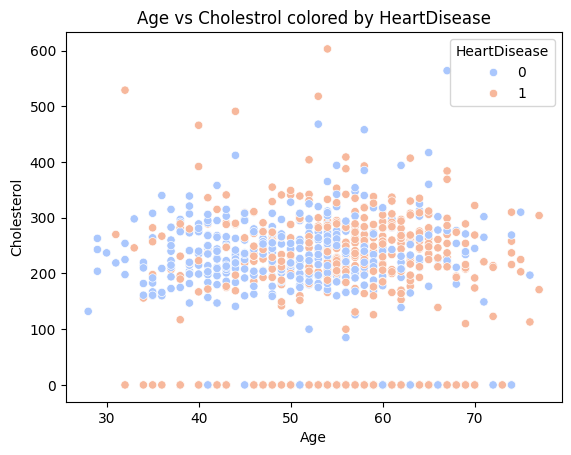

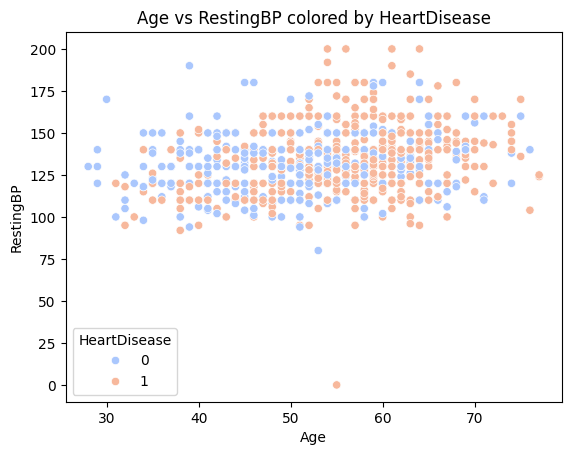

In [ ]:

sns.scatterplot(data=df_linear, x='Age', y='Cholesterol', hue='HeartDisease', palette='coolwarm')
plt.title("Age vs Cholestrol colored by HeartDisease")
plt.show()

sns.scatterplot(data=df_linear, x='Age', y='RestingBP', hue='HeartDisease', palette='coolwarm')
plt.title("Age vs RestingBP colored by HeartDisease")
plt.show()

sns.scatterplot(data=df_linear, x='RestingBP', y='Cholesterol', hue='HeartDisease', palette='coolwarm')
plt.title("Age vs RestingBP colored by HeartDisease")
plt.show()
